In [1]:
# Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Text(0.5, 0, 'Fuel Unit')

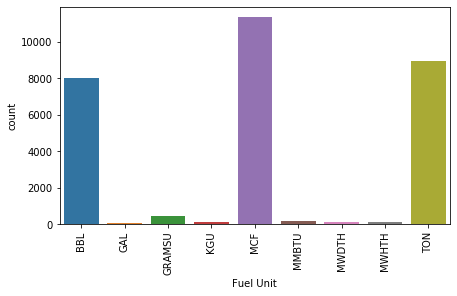

In [2]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
            'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')
#plt.ylabel('count of fuel_unit')

Text(0.5, 0, 'Fuel Unit')

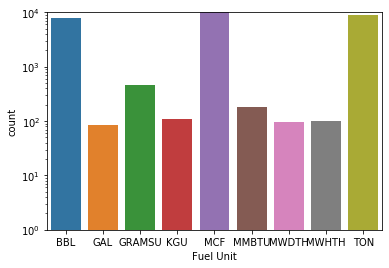

In [3]:
#Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the logarithm of the y-axis as follows:
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 10000)
plt.xlabel('Fuel Unit')
#plt.ylabel('count of fuel_unit')

In [6]:
import pandas as pd
fuel_data = pd.read_csv('C:/Users/Chidinma Kalu/Documents/Datascience Hamoye/stage A/fuel_ferc1.csv', error_bad_lines=False, index_col = 0)

In [9]:
fuel_data.head()

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,
f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [27]:
count = pd.DataFrame(fuel_data['fuel_type_code_pudl'].value_counts())

In [31]:
count.index

Index(['gas', 'coal', 'oil', 'nuclear', 'waste', 'other'], dtype='object')

Text(0, 0.5, 'count')

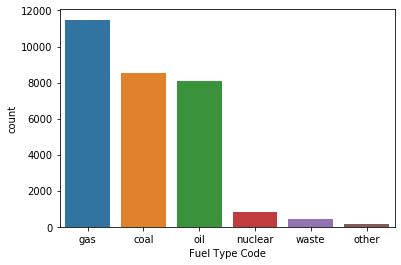

In [44]:
%matplotlib inline
h = sns.barplot(data=fuel_data, x=count.index, y=count['fuel_type_code_pudl'])
plt.xlabel('Fuel Type Code')
plt.ylabel('count')

In [10]:
fuel_data.shape

(29523, 10)

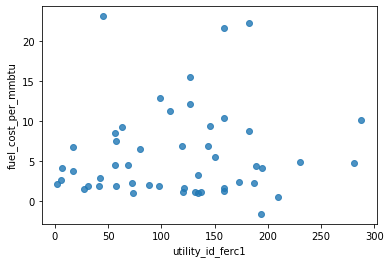

In [7]:
# Select a sample of the dataset
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)

<IPython.core.display.Javascript object>


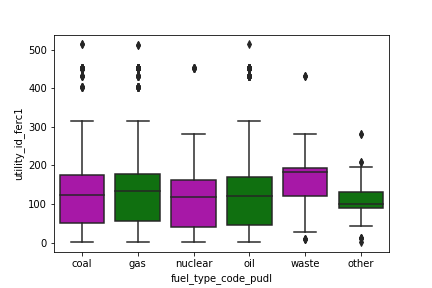

In [35]:
# Box plot
%matplotlib notebook
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
            palette=["m", "g"], data=fuel_data)

<IPython.core.display.Javascript object>


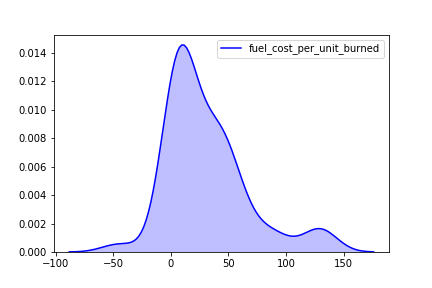

In [36]:
# KDE plot 
%matplotlib notebook
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")

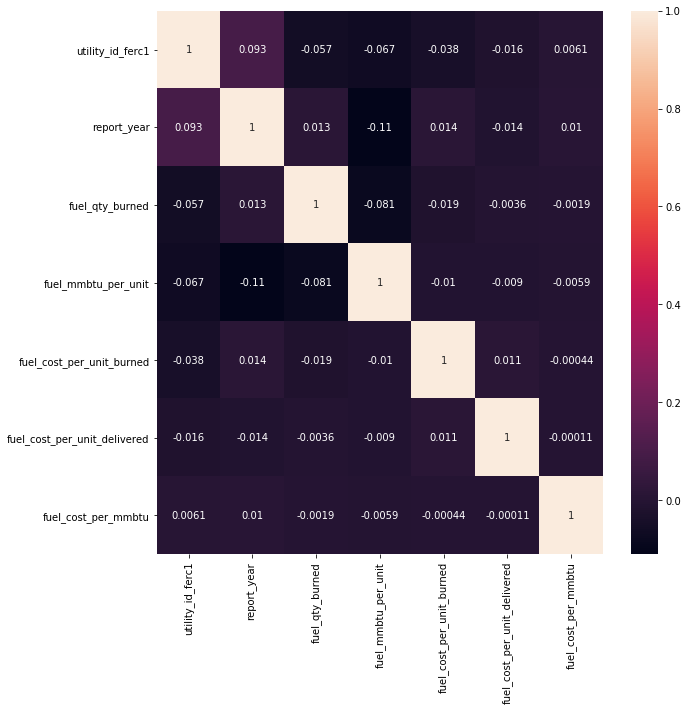

In [41]:
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(fuel_data.corr(), annot=True)

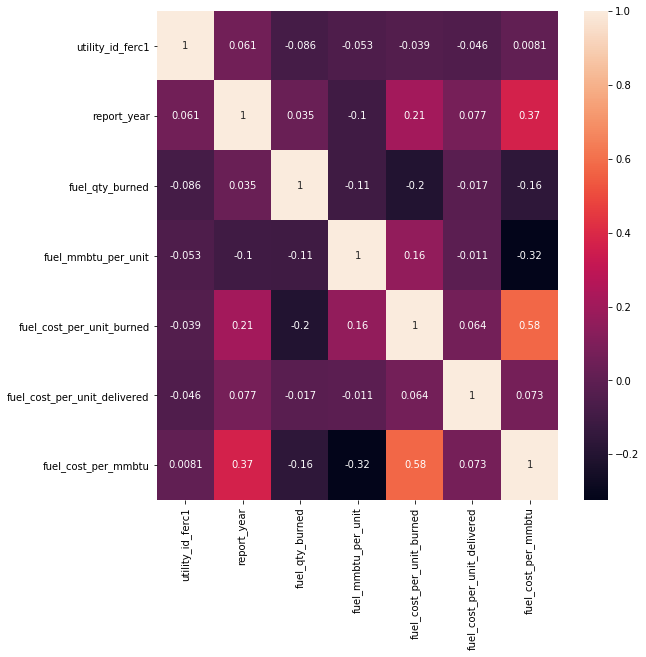

In [40]:
%matplotlib inline
plt.figure(figsize = (9,9))
sample_df = fuel_data.sample(n = 500, random_state = 4)
sns.heatmap(sample_df.corr(), annot = True)

### How popular is a fuel type?: we already know gas is the most popular but by how much and how popular are the others

In [42]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

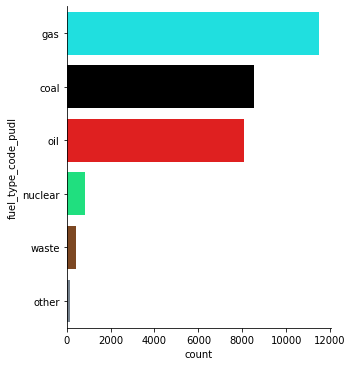

In [43]:
#%matplotlib notebook
col={"gas":"cyan","coal":"black","oil":"red","nuclear":"springgreen","waste":"saddlebrown","other":'slategray'}
sns.catplot(y='fuel_type_code_pudl',
            kind="count",data=fuel_data,palette=col,order=fuel_data['fuel_type_code_pudl'].value_counts().index)

In [45]:
fuel_data.groupby(['fuel_type_code_pudl'])['fuel_cost_per_mmbtu'].sum()

fuel_type_code_pudl
coal        15275.11517
gas         62126.34574
nuclear      1404.14500
oil        102402.57762
other       25899.18000
waste      362815.08200
Name: fuel_cost_per_mmbtu, dtype: float64

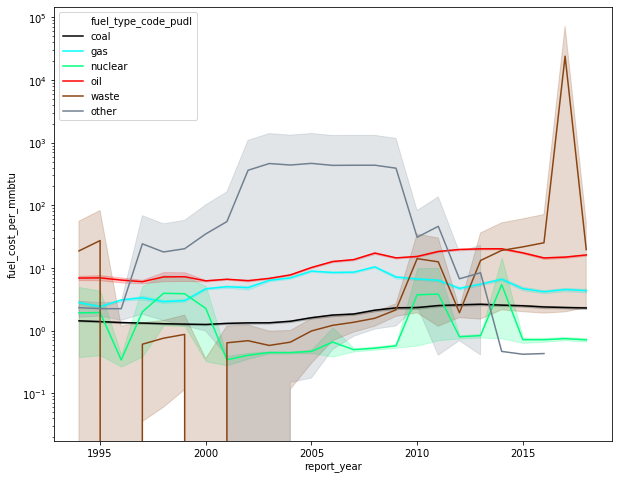

In [50]:
%matplotlib inline
plt.figure(figsize = (10, 8))
g=sns.lineplot(x='report_year', y='fuel_cost_per_mmbtu',hue='fuel_type_code_pudl',palette=col,data=fuel_data)
g.set_yscale("log")

### Are some fuels becoming popular over time

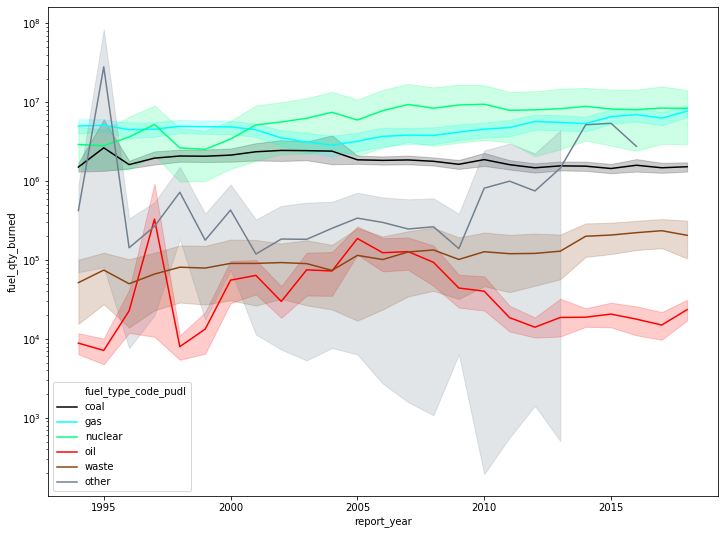

In [52]:
%matplotlib inline
plt.figure(figsize = (12, 9))
g = sns.lineplot(x = 'report_year', y = 'fuel_qty_burned', hue = 'fuel_type_code_pudl', palette = col, data = fuel_data)
g.set_yscale('log')

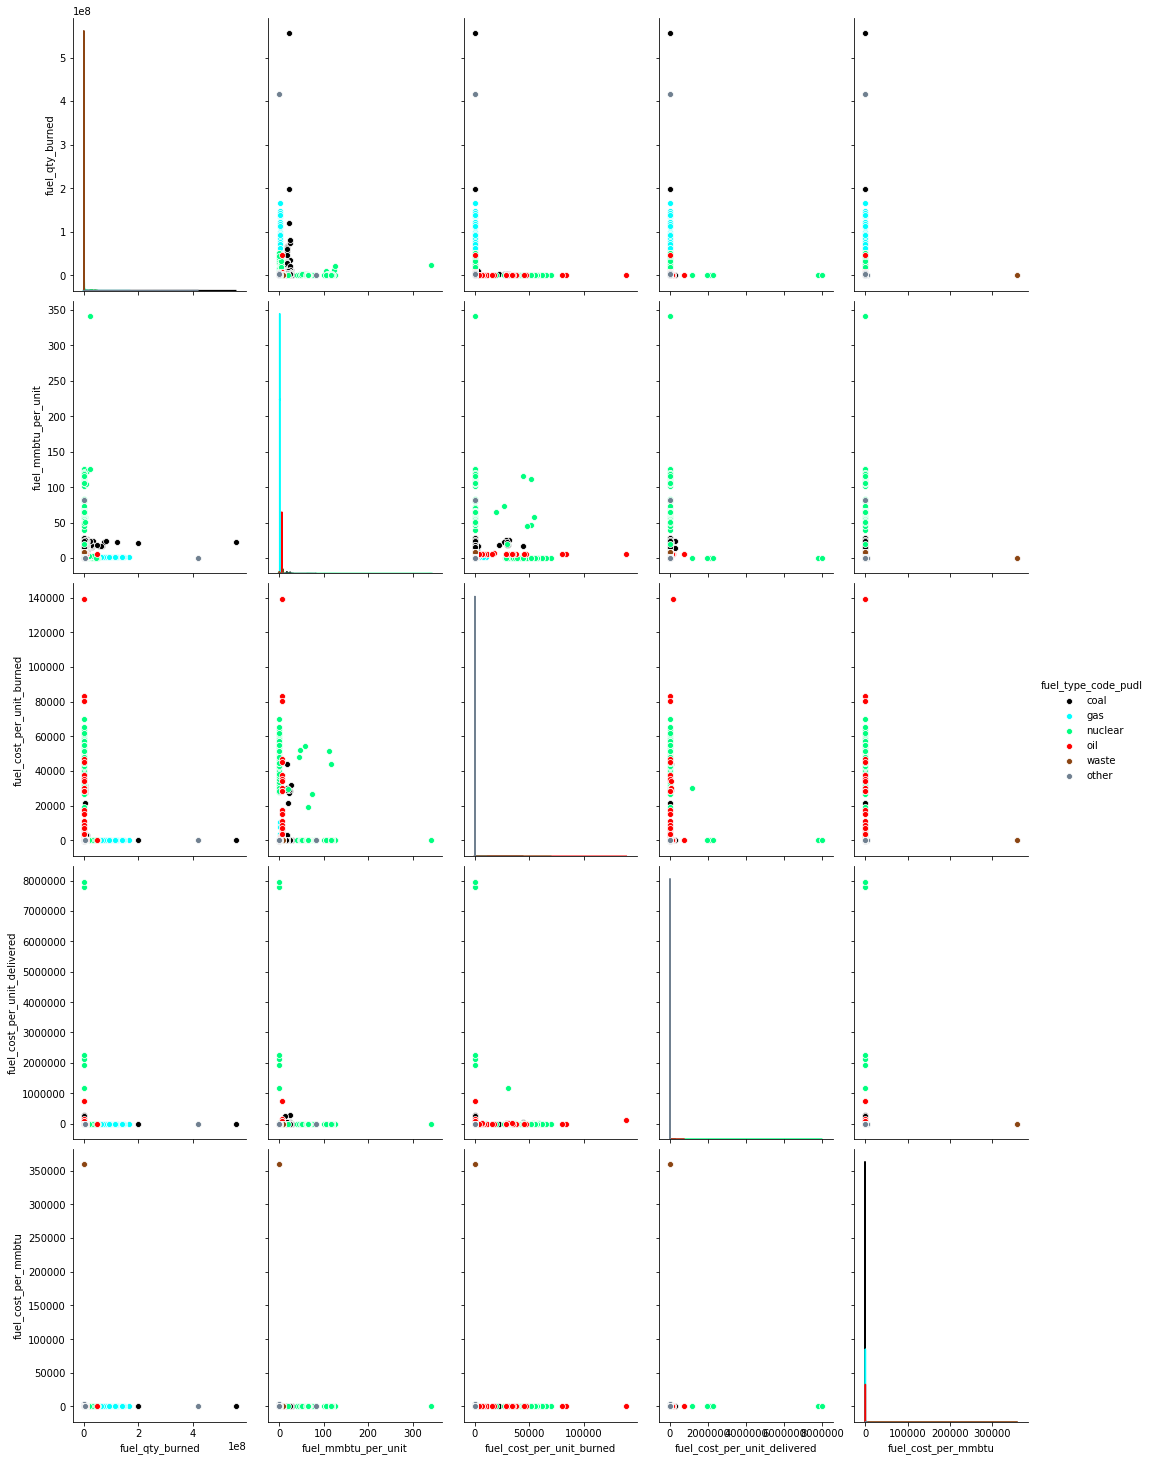

In [53]:
#to get all the scatter plots done at once
%matplotlib inline
a= sns.pairplot(fuel_data, hue='fuel_type_code_pudl',x_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               ,'fuel_cost_per_unit_delivered'
                               ,'fuel_cost_per_mmbtu'], y_vars=['fuel_qty_burned','fuel_mmbtu_per_unit','fuel_cost_per_unit_burned'
                               ,'fuel_cost_per_unit_delivered'
                               ,'fuel_cost_per_mmbtu'],palette=col,height=4,aspect=0.7)